## Nama/NIM : Cliffton Soenarto/0706022010001

### Latar Belakang

Dataset ini merupakan kumpulan data dari pasien kelenjar getah bening. Dataset berikut telah disediakan untuk kedepannya akan diterapi karena dataset yang digunakan masih belum sempurna. Berikut adalah rincian tabel-tabel yang ada pada dataset:

Gender: Jenis kelamin 

Age: Umur

Time: Waktu perawatan

Number of Warts: Jumlah benjolan

Type: Tipe benjolan

Area: Luas benjolan

Induration Diameter: Diameter benjolan

Result of Treatment: Hasil perawatan (0 jika tidak ada kemajuan, 1 jika ada kemajuan)

### Import Library

Pertama, yang akan dilakukan adalah memuat library yang akan digunakan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import statistics
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import norm
from sklearn.cluster import KMeans
from kneed import KneeLocator

### Load Dataset

Kemudian muat dataset yang akan digunakan.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ClifftonS/Data-Mining/main/ALP_projek/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


### EDA

Exploratory Data Analysis atau disingkat EDA berfungsi untuk memahami dataset secara lebih lanjut.

Kita juga harus memastikan bahwa data kita bersih (tidak memiliki nilai null, duplikat, dll) dan juga untuk mengetahui kolom apa saja yang tersedia pada dataset, jumlah data, dan tipe datanya.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Dari percobaan diatas bisa diketahui bahwa tidak ada data yang duplikat. Namun ada beberapa kolom yang didapati beberapa missing value yaitu kolom Time, Number_of_Warts, Type, dan induration_diameter. Karena jumlah data hanya sedikit sehingga tidak bisa menghapus value Nan, sehingga harus mengisi value Nan tersebut.

Mari kita lihat juga apakah ada ketimpangan dalam dataset dengan menggunakan barplot

<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

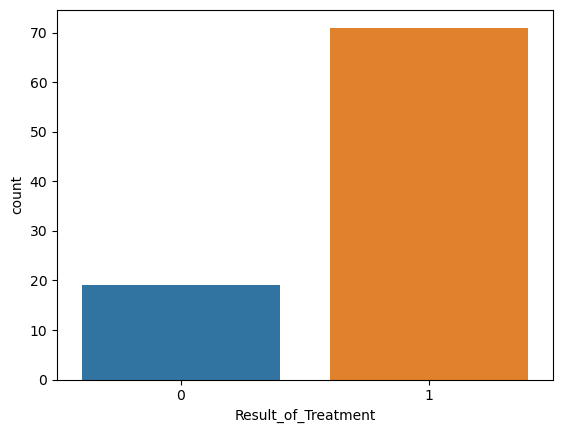

In [6]:
sns.countplot(x = df['Result_of_Treatment'])

Ternyata terjadi ada ketimpangan data sehingga perlu dibenahi nantinya

Kita juga perlu mencari korelasi antar variabelnya

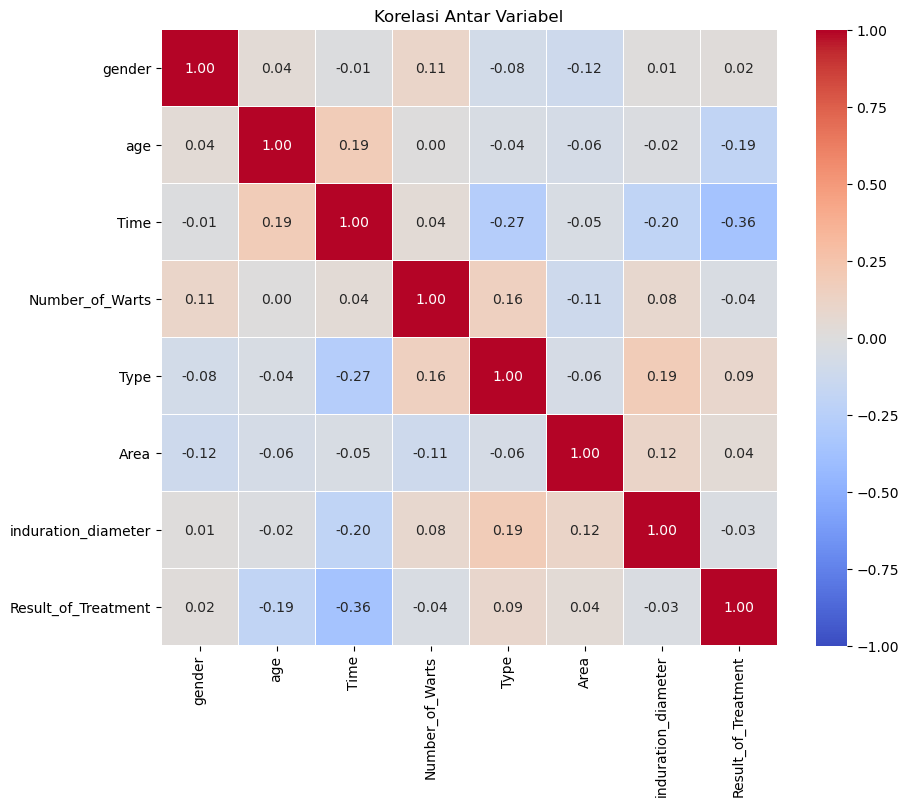

In [7]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

Besarnya angka menunjukan kuatnya korelasi, sedangkan untuk yang mendekati warna merah menunjukan korelasi positif dan sebaliknya korelasi negatif ditunjukan oleh warna biru

### Fill Nan Value

Selanjutnya kita akan mengisi missing value pada beberapa kolom dengan perlakuan yang berbeda disetiap kolomnya:

Time: Diisi dengan menggunakan regression

Number_of_Warts: Diisi dengan menggunakan median

Type: Diisi dengan menggunakan klasifikasi

induration_diameter: Diisi dengan menggunakan median

##### Pertama kita mempersiapkan data yang akan digunakan terlebih dahulu

In [8]:
dfdropreg = df.dropna(subset=['Time', 'Type', 'induration_diameter'])
dfdropclf = df.dropna(subset=['induration_diameter', 'Number_of_Warts', 'Type', 'Time'])

#### Time

Kita akan mengisi Nan value pada time menggunakan linear regression

In [9]:
X = dfdropreg[['age', 'Type', 'induration_diameter']]
y = dfdropreg['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print("Score: ",lr.score(X_test, y_test))

Root Mean Squared Error (RMSE):  1.3809237189269365
MAPE:  16.375327902824075
Score:  0.5663519597790626


Karena memiliki nilai error yang cukup rendah maka bisa digunakan untuk mengisi missing value pada kolom Time

In [10]:
df[df['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [11]:
df_timemiss = df["Time"].isna()
var_timemiss = pd.DataFrame(df[['age', 'Type', 'induration_diameter']][df_timemiss])
time_pred = np.round(lr.predict(var_timemiss), 2)
missingval = df['Time'].isna()
df.loc[missingval,'Time'] = time_pred

In [12]:
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,6.55,8.0,2.0,56,45.0,1
50,1,54,7.47,13.0,3.0,43,5.0,1
72,2,28,8.09,4.0,1.0,9,2.0,1


In [13]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

#### Type

Setelah itu kita perlu mengisi missing value pada kolom Type menggunakan classification KNN

In [14]:
X = dfdropclf[['induration_diameter', 'Number_of_Warts', 'Time']]
y = dfdropclf['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [1 2 0]
 [0 0 1]]
Accuracy Score:  0.875


Karena akurasi sudah cukup bagus maka akan digunakan untuk mengisi Nan pada variabel Type

In [15]:
df[df['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,NaN,50,9.0,0
26,1,20,8.00,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [16]:
df_typemiss = df["Type"].isna()
var_typemiss = pd.DataFrame(df[['induration_diameter', 'Number_of_Warts', 'Time']][df_typemiss])
type_pred = np.round(classifier.predict(var_typemiss.values))
missingval = df['Type'].isna()
df.loc[missingval,'Type'] = type_pred

In [17]:
df.iloc[[10,26,66, 86, 89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,1.0,50,9.0,0
26,1,20,8.00,6.0,1.0,45,8.0,1
66,2,23,6.75,6.0,1.0,19,2.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
89,2,53,7.25,6.0,1.0,81,7.0,1


#### Number of Warts & Induration Diameter

Kita cek terlebih dahulu apakah data terdistribusi normal atau skewed

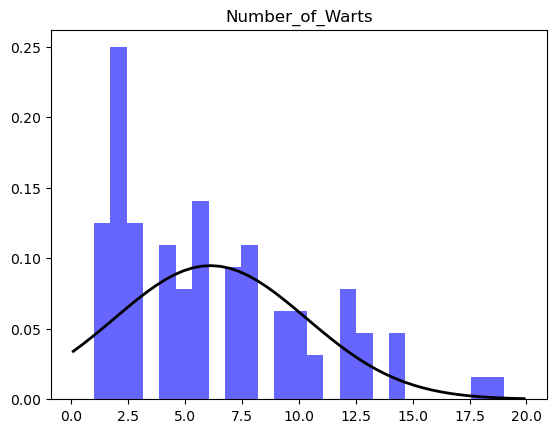

In [18]:
df2 = df[df['Number_of_Warts'].notna()]
data = df2['Number_of_Warts']
mu, std = norm.fit(data)
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Number_of_Warts')
plt.show()

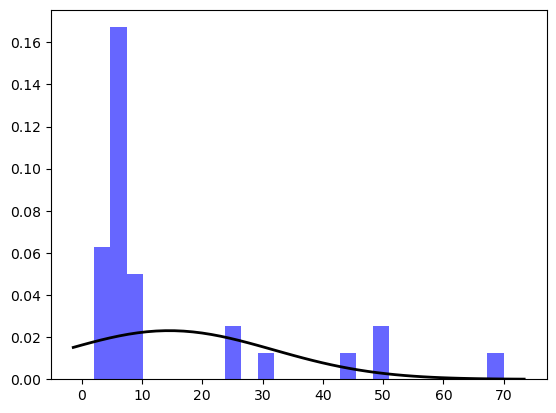

In [19]:
df2 = df[df['induration_diameter'].notna()]
data = df2['induration_diameter']
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

Selanjutnya untuk kolom Number_of_Warts dan induration_diameter bisa menggunakan median untuk mengisi missing value

In [20]:
df[df['induration_diameter'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,NaN,1
53,2,15,6.5,19.0,1.0,56,NaN,1


In [21]:
df[df['Number_of_Warts'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,NaN,1.0,208,6.0,0


In [22]:
df['Number_of_Warts']=df['Number_of_Warts'].fillna(np.round(df['Number_of_Warts'].median()))
df['induration_diameter']=df['induration_diameter'].fillna(np.round(df['induration_diameter'].median()))
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [23]:
df.iloc[[19, 53]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,7.0,1
53,2,15,6.5,19.0,1.0,56,7.0,1


In [24]:
df.iloc[[1]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,6.0,1.0,208,6.0,0


### Repair Dataset

Karena tipe data masih banyak yang tidak cocok maka akan dirapikan kembali

In [25]:
df[['Number_of_Warts', 'Type', 'induration_diameter']] = df[['Number_of_Warts', 'Type', 'induration_diameter']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


Untuk mengatasi imbalence pada dataset akan menggunakan metode oversample smote

In [26]:
X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
df2 = pd.DataFrame(X_smote)
df2["Result_of_Treatment"] = y_smote

Kita cek lagi apakah ada data yang terduplikat

In [27]:
df2.duplicated().sum()

0

Selanjutnya kita cek juga apakah data sudah tidak timpang

<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

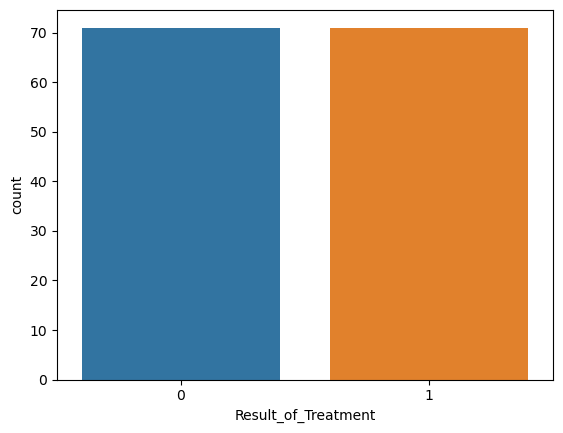

In [28]:
sns.countplot(x = df2['Result_of_Treatment'])

Kita juga akan merename nama variabel agar lebih mudah dalam memprosesnya

In [29]:
df2 = df2.rename(columns = {'gender' : 'gender','age' : 'age','Time':'time','Number_of_Warts':'number_of_warts','Type':'type','Area':'area','induration_diameter':'induration_diameter','Result_of_Treatment':'result_of_treatment'})

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   number_of_warts      142 non-null    int64  
 3   area                 142 non-null    int64  
 4   induration_diameter  142 non-null    int64  
 5   type                 142 non-null    int64  
 6   time                 142 non-null    float64
 7   result_of_treatment  142 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.0 KB


Dataset sudah berhasil dibenahi dengan baik

### Create Model

#### Regression

In [31]:
X = df2[['age', 'type', 'induration_diameter']]
y = df2['time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 25)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print("Score: ",lr.score(X_test, y_test))

Root Mean Squared Error (RMSE):  2.1157485260194466
MAPE:  25.114333709695085
Score:  0.19426587531229145


In [32]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table

,y_test,y_pred
69,4.250000,8.299465
113,10.673446,8.730361
105,11.657714,8.950434
125,6.134386,7.508146
26,8.000000,7.984500
97,7.246924,7.712096
79,7.750000,9.742287
100,8.695733,8.864372
107,9.609606,9.614144
6,11.250000,9.678216


#### Classification

Selanjutnya membuat model klasifikasi untuk prediksi menggunakan KNN classifier

In [33]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values
#Membuat model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
#Uji model dengan data test
y_pred = classifier.predict(X_test)
#Ukur akurasi dari model K-Nearest Neighbor
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0]
 [2 7]]
Accuracy Score:  0.8666666666666667


In [34]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


#### Clustering

Dengan elbow method, menggunakan range elbow range(1, 11)

In [35]:
scale = StandardScaler()
dfscale = scale.fit_transform(df2)
# set the parameter for evaluating K
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeansmodel.fit(dfscale)
    sse.append(kmeansmodel.inertia_)

C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

Training model K-Means pada dataset dengan jumlah cluster yang Anda tentukan

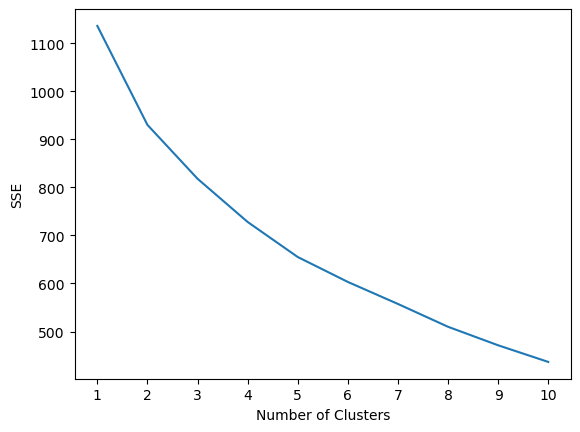

In [36]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Menggunakan Kneelocator untuk mencari elbow

In [37]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Membagi menjadi 4 cluster

In [38]:
kmeans = KMeans(n_clusters=4,init="random").fit(dfscale)
sse.append(kmeansmodel.inertia_)
df_kmeans = kmeans.predict(dfscale)
df2["Cluster"]=df_kmeans
df2.head()

C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,gender,age,number_of_warts,area,induration_diameter,type,time,result_of_treatment,Cluster
0,1,15,6,30,25,1,11.00,0,0
1,1,27,6,208,6,1,11.75,0,0
2,1,32,9,43,50,1,12.00,0,0
3,1,33,7,379,7,2,1.75,0,0
4,1,34,7,64,7,3,5.00,0,1


Menghitung jumlah cluster

In [39]:
df2.groupby("Cluster").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('time', 'mean'), 
                          Number_of_Warts = ('number_of_warts', 'mean'), 
                          Type = ('type', pd.Series.mode), 
                          Area = ('area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Result_of_Treatment = ('result_of_treatment', pd.Series.mode), 
                          Count = ('Cluster', 'count'))

,Gender,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment,Count
Cluster,,,,,,,,,
0,1,36.511111,9.632347,6.488889,1,100.577778,14.022222,0,45
1,1,30.125000,4.834167,8.208333,3,86.375000,25.166667,1,24
2,2,24.000000,6.662087,4.279070,1,92.046512,7.860465,1,43
3,2,39.833333,10.072730,6.866667,1,65.933333,11.833333,0,30
